Sumber data:
- [FRED, Data produksi keju amerika](https://fred.stlouisfed.org/series/M01073USM149NNBR)<br>
- [Airline Passenger Dataset](https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Classic Time Series Decomposition -> 1920

Teknik untuk memisahkan time series menjadi trend, seasonal, dan residual menggunakan Moving Average. Ada 2 tipe:
```
additive = Trend + Seasonal + Residual
multiplicative = Trend * Seasonal * Residual
```

Additive dipakai pada **trend dan seasonal yang tidak terlalu bervariasi**<br>
multiplicative dipakai pada **trend dan seasonal yang berubah seiring berjalannya waktu**

Contoh:
- Additive: Terdapat peningkatan pelanggan 10000 orang / tahun
- Multiplicative: Terdapat peningkatan pelanggan 10% / tahun

### Contoh untuk Additive

In [2]:
from jcopml.time_series.decomposition import additive_decomposition

<Axes: xlabel='date'>

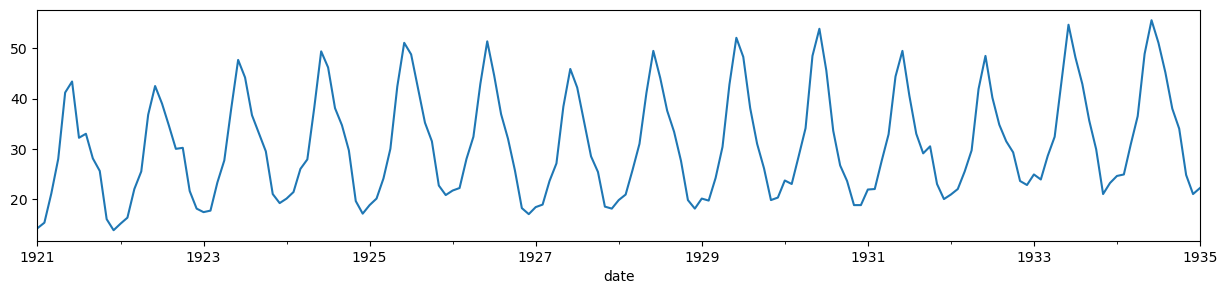

In [3]:
df = pd.read_csv("data/cheese_fred.csv", index_col="date", parse_dates=["date"])
series = df.total_cheese_production
series.plot(figsize=(15, 3))

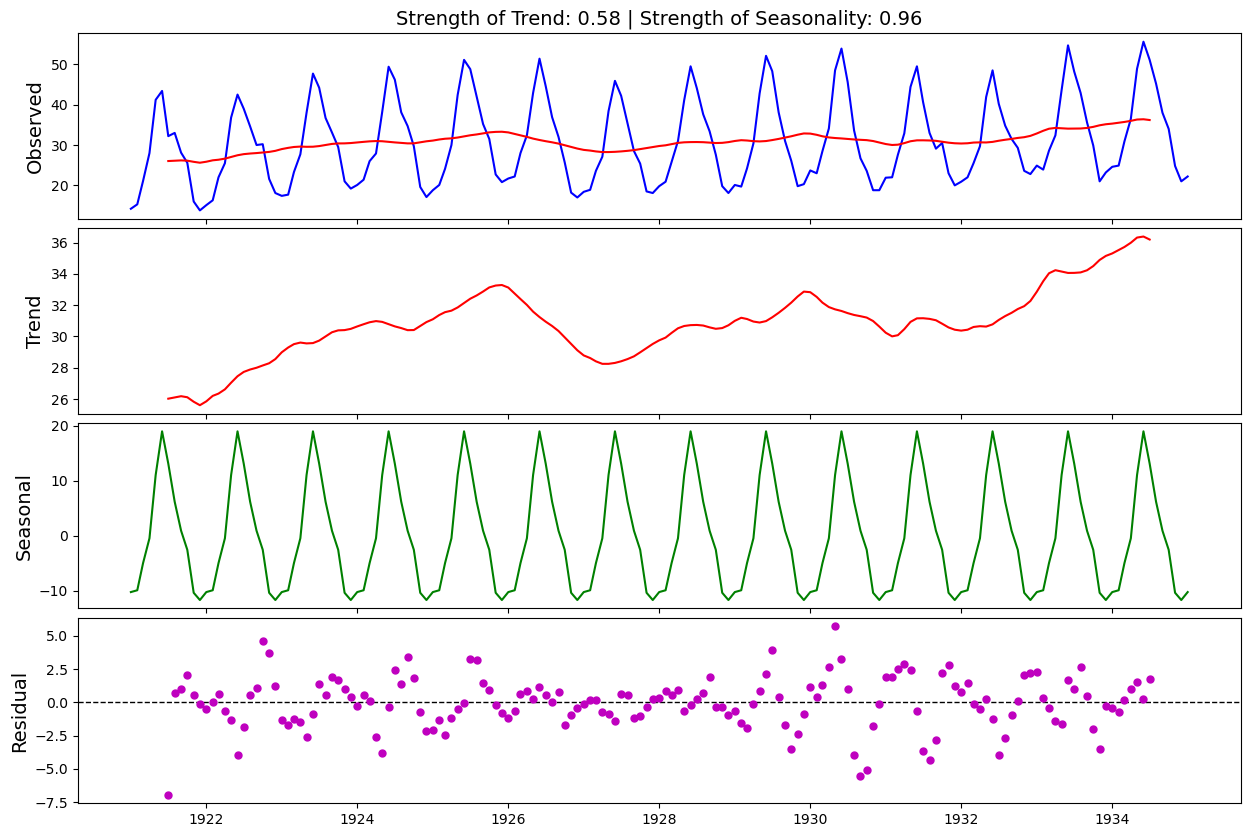

In [4]:
components = additive_decomposition(series, plot=True)

### Contoh untuk Multiplicative

In [5]:
from jcopml.time_series.decomposition import multiplicative_decomposition

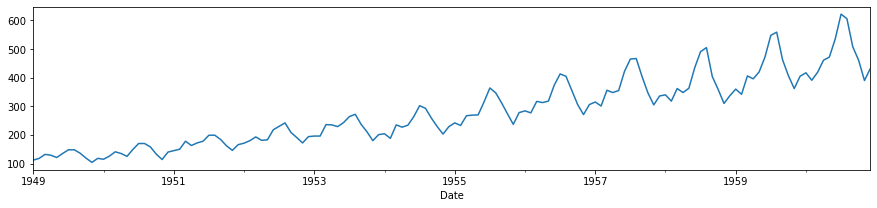

In [6]:
df = pd.read_csv("data/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
series.plot(figsize=(15, 3))

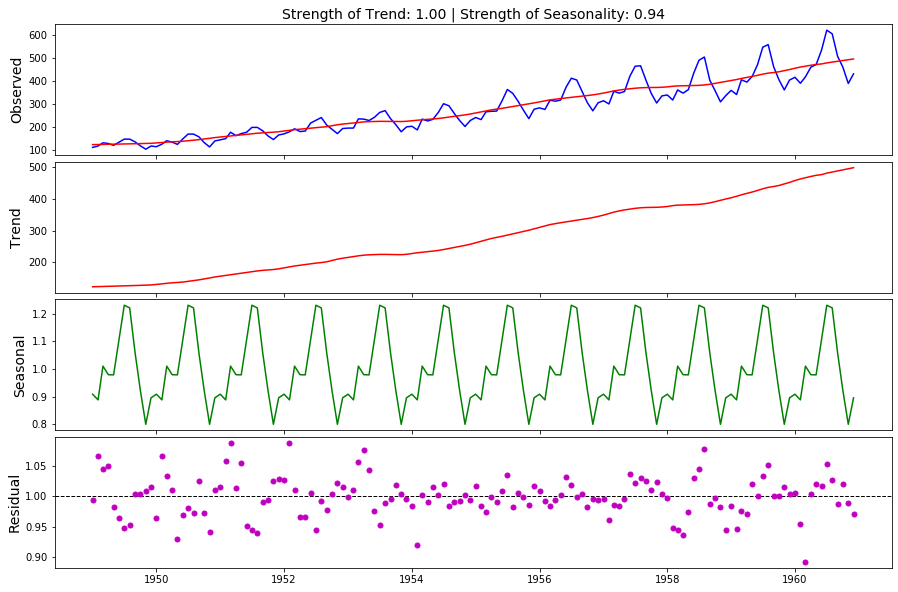

In [7]:
components = multiplicative_decomposition(series, plot=True, extrapolate_trend=True)

# Seasonal-Trend decomposition with LOESS (STL) -> 1990

LOESS (locally estimated scatterplot smoothing) mulanya didesain untuk smoothing scatterplot. Idenya adalah menggunakan Moving Regression.

STL sendiri memiliki beberapa kelebihan:
- komponen seasonal bisa berubah seiring waktu
- smoothing pada trend dan seasonal

In [8]:
from jcopml.time_series.decomposition import stl_decomposition

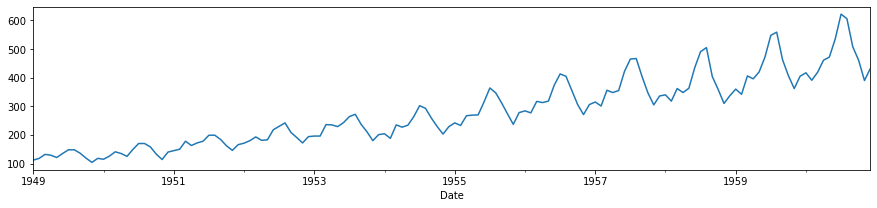

In [9]:
df = pd.read_csv("data/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
series.plot(figsize=(15, 3))

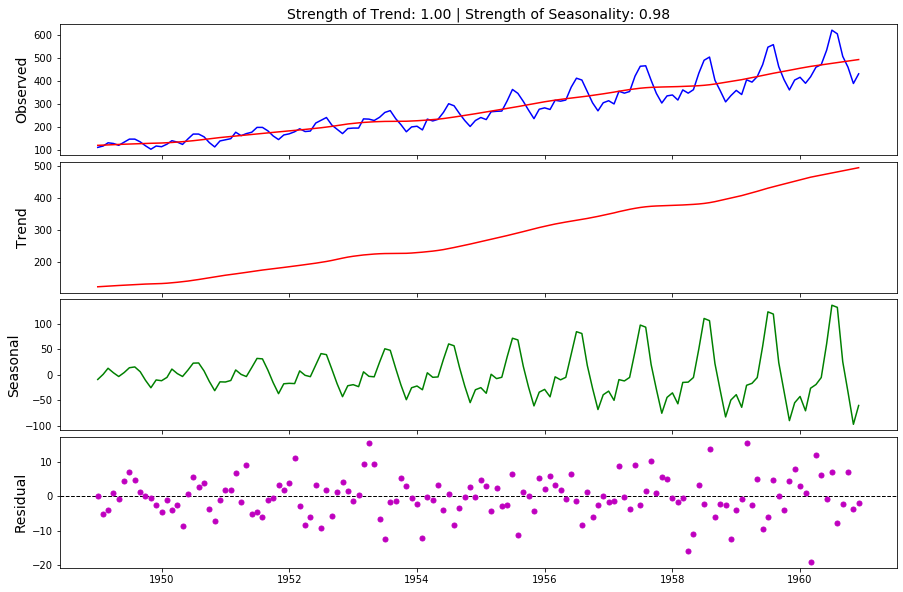

In [10]:
components = stl_decomposition(series, plot=True)